# Compare to ANOVA and LMM: ROC curve

In [7]:
from bayes_window import model_comparison, models
from bayes_window.generative_models import generate_fake_lfp

import numpy as np
from importlib import reload
reload(model_comparison)

<module 'bayes_window.model_comparison' from '/home/m/mmy/bayes-window/bayes_window/model_comparison.py'>

In [8]:
res = model_comparison.run_conditions(true_slopes=np.hstack([np.zeros(10), np.tile(np.linspace(.2, 20, 10), 10)]),
                                      n_trials=range(10, 90, 70),
                                      trial_baseline_randomness=(.2, 1, 4, 5, 7, 10.8),
                                      parallel=True)


100%|██████████| 1320/1320 [58:49<00:00,  2.67s/it]


## Binary

In [9]:
reload(model_comparison)
df = model_comparison.make_roc_auc(
    res, binary=True, groups=('method', 'y', 'randomness', 'n_trials'))

In [10]:
bars, roc = model_comparison.plot_roc(df)
bars.facet(column='n_trials', row='y').properties().display()
roc.facet(column='n_trials', row='y').properties()

alt.FacetChart(...)

alt.FacetChart(...)

In [11]:
bars, roc = model_comparison.plot_roc(df)
bars.facet(column='y').properties().display()
roc.facet(column='y').properties()

alt.FacetChart(...)

alt.FacetChart(...)

## CM

In [12]:
# def plot_roc(res, binary=True, groups=('method', 'y', 'randomness', 'n_trials')):
# Make ROC and AUC
reload(model_comparison)

model_comparison.plot_confusion(
    model_comparison.make_confusion_matrix(res, ('method', 'y', 'randomness', 'n_trials')
                                           )).facet(column='method', row='y')

alt.FacetChart(...)

## Model comparison

               rank      loo    p_loo    d_loo      weight       se      dse  \
full_student      0  895.494  3.04125        0    0.401489  13.9653        0   
full_lognogmal    1  893.025  2.84121  2.46939    0.367422   17.806  17.2533   
full_normal       2  888.694  3.05459   6.8001    0.221019  12.9312  17.3023   
no_group          3  866.963  2.35584   28.531   0.0065826  12.8895   17.682   
no_teratment      4  858.684  2.85128  36.8103  0.00348815  11.8425  20.7464   

               warning loo_scale  
full_student     False       log  
full_lognogmal   False       log  
full_normal      False       log  
no_group         False       log  
no_teratment     False       log  


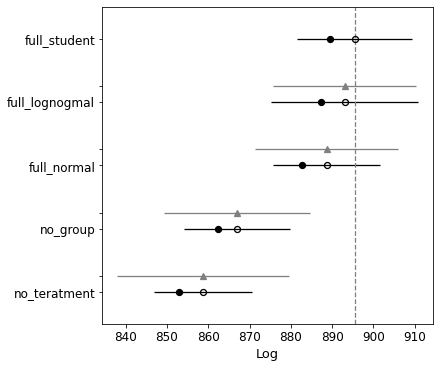

In [4]:
reload(model_comparison)
df, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=13,
                                                 n_trials=40)
model_comparison.compare_models(df=df,
               models={
                       'no_teratment': models.model_hierarchical,
                       'no_group':models.model_hierarchical,
                       'full_normal': models.model_hierarchical,
                       'full_student': models.model_hierarchical,
                       'full_lognogmal': models.model_hierarchical,
                       
                      },
               extra_model_args=[
                                 {'treatment': None},
                   {'group':None},
                                 {'treatment': 'stim'},
                                {'treatment': 'stim', 'dist_y':'student'},
                                {'treatment': 'stim', 'dist_y':'lognormal'},
                                ],
               y='isi',
                                condition=None,
               parallel=False
               );
